# Preparación ambiente

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

# Importación dataset

In [39]:
old_data=pd.read_csv("patient.csv")
old_data["death_date"]=old_data["death_date"].replace({"9999-99-99": 1})
old_data.loc[old_data['death_date'] != 1, 'death_date'] = 0

In [40]:
old_data.nunique()

sex                         2
patient_type                2
intubated                   4
pneumonia                   3
age                       104
pregnant                    4
diabetes                    3
copd                        3
asthma                      3
immunosuppression           3
hypertension                3
other_diseases              3
cardiovascular              3
obesity                     3
chronic_kidney_failure      3
smoker                      3
another_case                3
outcome                     3
icu                         4
death_date                  2
dtype: int64

In [41]:
old_data['death_date']=old_data['death_date'].astype(object).astype(int)

In [42]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95839 entries, 0 to 95838
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   sex                     95839 non-null  int64
 1   patient_type            95839 non-null  int64
 2   intubated               95839 non-null  int64
 3   pneumonia               95839 non-null  int64
 4   age                     95839 non-null  int64
 5   pregnant                95839 non-null  int64
 6   diabetes                95839 non-null  int64
 7   copd                    95839 non-null  int64
 8   asthma                  95839 non-null  int64
 9   immunosuppression       95839 non-null  int64
 10  hypertension            95839 non-null  int64
 11  other_diseases          95839 non-null  int64
 12  cardiovascular          95839 non-null  int64
 13  obesity                 95839 non-null  int64
 14  chronic_kidney_failure  95839 non-null  int64
 15  smoker             

In [43]:
old_data.head()

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,1
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,1
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,1
3,2,2,2,2,57,97,1,2,2,2,2,2,2,2,2,2,99,1,2,0
4,1,2,2,2,44,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1


# Correlación entre variables

In [44]:
old_data.corr().abs()

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
sex,1.000000,0.104142,0.104231,0.041587,0.036508,0.995064,0.015488,0.017833,0.017779,0.014783,0.016326,0.019640,0.015451,0.016856,0.015694,0.011192,0.016174,0.045686,0.104268,0.052972
patient_type,0.104142,1.000000,0.999327,0.263222,0.277913,0.103534,0.012617,0.020348,0.026499,0.025789,0.011135,0.039194,0.024838,0.022876,0.022190,0.024992,0.183498,0.087532,0.999299,0.282048
intubated,0.104231,0.999327,1.000000,0.263512,0.278253,0.103628,0.012775,0.020500,0.026657,0.025573,0.011283,0.039362,0.024987,0.023029,0.022344,0.025147,0.183582,0.087906,0.999966,0.282923
pneumonia,0.041587,0.263222,0.263512,1.000000,0.103844,0.041455,0.001884,0.004933,0.007060,0.007793,0.001364,0.014695,0.007436,0.005875,0.005447,0.006953,0.033221,0.033883,0.263465,0.108989
age,0.036508,0.277913,0.278253,0.103844,1.000000,0.035711,0.006527,0.019210,0.024390,0.023457,0.002451,0.025646,0.021370,0.017958,0.024006,0.022067,0.046247,0.072277,0.278264,0.185163
pregnant,0.995064,0.103534,0.103628,0.041455,0.035711,1.000000,0.027024,0.030218,0.030095,0.026829,0.028412,0.029823,0.027337,0.028823,0.027718,0.022950,0.015163,0.047578,0.103665,0.052960
diabetes,0.015488,0.012617,0.012775,0.001884,0.006527,0.027024,1.000000,0.869776,0.881200,0.858777,0.876861,0.749238,0.866721,0.809533,0.862719,0.837194,0.026889,0.030232,0.012740,0.006402
copd,0.017833,0.020348,0.020500,0.004933,0.019210,0.030218,0.869776,1.000000,0.918751,0.910085,0.893289,0.783647,0.903781,0.843663,0.900077,0.871733,0.032278,0.036061,0.020460,0.012222
asthma,0.017779,0.026499,0.026657,0.007060,0.024390,0.030095,0.881200,0.918751,1.000000,0.918711,0.897319,0.791514,0.912634,0.848370,0.914133,0.886042,0.034112,0.037689,0.026633,0.014577
immunosuppression,0.014783,0.025789,0.025573,0.007793,0.023457,0.026829,0.858777,0.910085,0.918711,1.000000,0.891359,0.791973,0.906272,0.848535,0.903133,0.877877,0.033583,0.033387,0.025190,0.017316


In [45]:
old_data.shape

(95839, 20)

<AxesSubplot:>

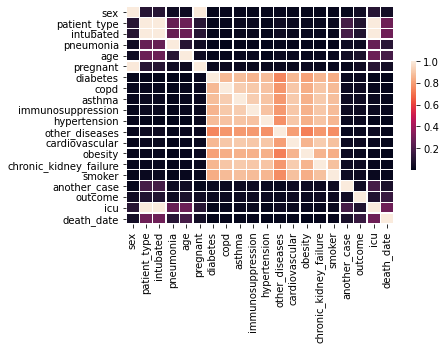

In [46]:
sns.heatmap(old_data.corr().abs(),annot=False,linewidths=.5, cbar_kws={"shrink": .5})

# Creación variables X e Y

In [47]:
#sns.heatmap(data.corr().abs(),annot=True)
x=old_data.drop(["death_date"],axis=1)
y=old_data["death_date"]
y=pd.DataFrame(y)
y

,death_date
0,1
1,1
2,1
3,0
4,1
...,...
95834,1
95835,1
95836,1
95837,1


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print ("X_train:" , x_train.shape[0])
print ("y_train:" , y_train.shape[0])
print ("X_test:" , x_test.shape[0])
print ("y_test:" , y_test.shape[0])

X_train: 76671
y_train: 76671
X_test: 19168
y_test: 19168


In [49]:
y_train=pd.DataFrame(y_train)
y_train

,death_date
39134,1
12427,1
7549,1
54838,1
74682,1
...,...
21440,1
73349,1
50057,1
5192,1


In [50]:
y_train=y_train.astype('float')
y_test=y_test.astype('float')

# Machine Learning Algorithms

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [52]:
#Navie Bayes
nb=GaussianNB()
nb.fit(x_train, y_train)
score_nb=nb.score(x_test,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
score_knn=knn.score(x_test,y_test)

#Logistic regression
scaler = StandardScaler()
x_trainstd = scaler.fit_transform(x_train)
x_teststd = scaler.transform(x_test)
lr = LogisticRegression()
lr.fit(x_trainstd, y_train)
score_lr= lr.score(x_teststd, y_test)

#Score
print ("Navie Bayes Acc Score:",score_nb)
print ("KNN Acc Score:",score_knn)
print("Logistic Regression Score:", score_lr)

Navie Bayes Acc Score: 0.9216924040066778
KNN Acc Score: 0.9566464941569283
Logistic Regression Score: 0.9621243739565943


In [53]:
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_lr = lr.predict(x_test)

# Confusion_matrix

In [54]:
print("CM NB:\n", confusion_matrix(y_test, y_pred_nb))
print("CM KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("CM LR:\n", confusion_matrix(y_test, y_pred_lr))

CM NB:
 [[  360   364]
 [ 1137 17307]]
CM KNN:
 [[   88   636]
 [  195 18249]]
CM LR:
 [[  633    91]
 [ 3766 14678]]


# Recall,Precision and F-1 Score


* Recall    =  TP / (TP + FN)
* Precision = TP / (TP + FP) 
* F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [55]:
print("NB:\n", classification_report(y_test,y_pred_nb))
print("KNN:\n", classification_report(y_test,y_pred_knn))
print("LR:\n", classification_report(y_test,y_pred_lr))

NB:
               precision    recall  f1-score   support

         0.0       0.24      0.50      0.32       724
         1.0       0.98      0.94      0.96     18444

    accuracy                           0.92     19168
   macro avg       0.61      0.72      0.64     19168
weighted avg       0.95      0.92      0.93     19168

KNN:
               precision    recall  f1-score   support

         0.0       0.31      0.12      0.17       724
         1.0       0.97      0.99      0.98     18444

    accuracy                           0.96     19168
   macro avg       0.64      0.56      0.58     19168
weighted avg       0.94      0.96      0.95     19168

LR:
               precision    recall  f1-score   support

         0.0       0.14      0.87      0.25       724
         1.0       0.99      0.80      0.88     18444

    accuracy                           0.80     19168
   macro avg       0.57      0.84      0.57     19168
weighted avg       0.96      0.80      0.86     19168



In [56]:
print ("F1 Score NB:", f1_score(y_test,y_pred_nb))
print ("F1 Score KNN:", f1_score(y_test,y_pred_knn))
print ("F1 Score LR:", f1_score(y_test,y_pred_lr))

F1 Score NB: 0.9584383220268586
F1 Score KNN: 0.9777384875030137
F1 Score LR: 0.8838707734923072


# roc & auc

In [57]:
#NB
probs_nb=nb.predict_proba(x_test)
preds_nb=probs_nb[:,1]
fpr_nb,tpr_nb, threshold_nb =metrics.roc_curve(y_test, y_pred_nb)
roc_auc_nb=metrics.auc(fpr_nb,tpr_nb)

#KNN
probs_knn=knn.predict_proba(x_test)
preds_knn=probs_knn[:,1]
fpr_knn,tpr_knn, threshold_knn =metrics.roc_curve(y_test, y_pred_knn)
roc_auc_knn=metrics.auc(fpr_knn,tpr_knn)

#LR
probs_lr=lr.predict_proba(x_test)
preds_lr=probs_lr[:,1]
fpr_lr,tpr_lr, threshold_lr =metrics.roc_curve(y_test, y_pred_lr)
roc_auc_lr=metrics.auc(fpr_lr,tpr_lr)

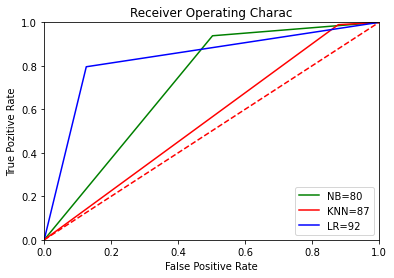

In [58]:
plt.title("ROC")

plt.plot(fpr_nb, tpr_nb, 'g', label="NB=80" % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'r', label="KNN=87" % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'b', label="LR=92" % roc_auc_nb)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Pozitive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Lighter data (sin variables que no aportan)

In [59]:
f_data=old_data.drop(["diabetes","copd","asthma","immunosuppression","hypertension","other_diseases","cardiovascular","obesity","chronic_kidney_failure","smoker"],axis=1)

In [60]:
f_data.corr().abs()

,sex,patient_type,intubated,pneumonia,age,pregnant,another_case,outcome,icu,death_date
sex,1.000000,0.104142,0.104231,0.041587,0.036508,0.995064,0.016174,0.045686,0.104268,0.052972
patient_type,0.104142,1.000000,0.999327,0.263222,0.277913,0.103534,0.183498,0.087532,0.999299,0.282048
intubated,0.104231,0.999327,1.000000,0.263512,0.278253,0.103628,0.183582,0.087906,0.999966,0.282923
pneumonia,0.041587,0.263222,0.263512,1.000000,0.103844,0.041455,0.033221,0.033883,0.263465,0.108989
age,0.036508,0.277913,0.278253,0.103844,1.000000,0.035711,0.046247,0.072277,0.278264,0.185163
pregnant,0.995064,0.103534,0.103628,0.041455,0.035711,1.000000,0.015163,0.047578,0.103665,0.052960
another_case,0.016174,0.183498,0.183582,0.033221,0.046247,0.015163,1.000000,0.048133,0.183644,0.067689
outcome,0.045686,0.087532,0.087906,0.033883,0.072277,0.047578,0.048133,1.000000,0.087843,0.146525
icu,0.104268,0.999299,0.999966,0.263465,0.278264,0.103665,0.183644,0.087843,1.000000,0.282638
death_date,0.052972,0.282048,0.282923,0.108989,0.185163,0.052960,0.067689,0.146525,0.282638,1.000000


In [61]:
f_data.shape

(95839, 10)

<AxesSubplot:>

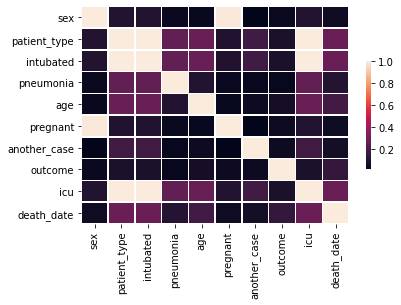

In [62]:
sns.heatmap(f_data.corr().abs(),annot=False,linewidths=.5, cbar_kws={"shrink": .5})

In [63]:
xf=f_data.drop(["death_date"],axis=1)
yf=f_data["death_date"]
yf=pd.DataFrame(yf)
yf

,death_date
0,1
1,1
2,1
3,0
4,1
...,...
95834,1
95835,1
95836,1
95837,1


In [64]:
xf_train,xf_test,yf_train,yf_test=train_test_split(xf,yf,test_size=0.2,random_state=1)
print ("xf_train:" , xf_train.shape[0])
print ("yf_train:" , yf_train.shape[0])
print ("xf_test:" , xf_test.shape[0])
print ("xf_train:" , yf_test.shape[0])

xf_train: 76671
yf_train: 76671
xf_test: 19168
xf_train: 19168


In [65]:
yf_train=yf_train.astype('float')
yf_test=yf_test.astype('float')

In [73]:
#Navie Bayes
nb.fit(xf_train, yf_train)
score_nbf=nb.score(xf_test,yf_test)

#KNN
knn.fit(xf_train,yf_train)
score_knnf=knn.score(xf_test,yf_test)

#LR
lr.fit(xf_train,yf_train)
score_lrf=knn.score(xf_test,yf_test)

print ("Naive Bayes Acc Score:",score_nbf)
print ("KNN Acc Score:",score_knnf)
print ("LR Acc Score:",score_lrf)


Naive Bayes Acc Score: 0.7824499165275459
KNN Acc Score: 0.9568030050083473
LR Acc Score: 0.9568030050083473


In [67]:
yf_pred_nb = nb.predict(xf_test)
yf_pred_knn = knn.predict(xf_test)
yf_pred_lr = lr.predict(xf_test)


In [68]:
print ("CM NB:\n",confusion_matrix(yf_test, yf_pred_nb))
print ("CM KNN:\n",confusion_matrix(yf_test, yf_pred_knn))
print ("CM LR:\n",confusion_matrix(yf_test, yf_pred_lr))
       
#sns.heatmap(confusion_matrix(yf_pred11,yf_test), annot=True,lw=2,cbar=False)
#plt.ylabel("True Values")
#plt.xlabel("Preict Value")
#plt.title("Confusion_matrix")

CM NB:
 [[  648    76]
 [ 4094 14350]]
CM KNN:
 [[  108   616]
 [  212 18232]]
CM LR:
 [[    6   718]
 [    7 18437]]


In [69]:
print("CLASS REPORT NB:\n",classification_report(yf_test,yf_pred_nb))
print("CLASS REPORT KNN:\n",classification_report(yf_test,yf_pred_knn))
print("CLASS REPORT LR:\n",classification_report(yf_test,yf_pred_lr))


CLASS REPORT NB:
               precision    recall  f1-score   support

         0.0       0.14      0.90      0.24       724
         1.0       0.99      0.78      0.87     18444

    accuracy                           0.78     19168
   macro avg       0.57      0.84      0.56     19168
weighted avg       0.96      0.78      0.85     19168

CLASS REPORT KNN:
               precision    recall  f1-score   support

         0.0       0.34      0.15      0.21       724
         1.0       0.97      0.99      0.98     18444

    accuracy                           0.96     19168
   macro avg       0.65      0.57      0.59     19168
weighted avg       0.94      0.96      0.95     19168

CLASS REPORT LR:
               precision    recall  f1-score   support

         0.0       0.46      0.01      0.02       724
         1.0       0.96      1.00      0.98     18444

    accuracy                           0.96     19168
   macro avg       0.71      0.50      0.50     19168
weighted avg       

In [70]:
print ("F1 Score NB:", f1_score(yf_test,yf_pred_nb))
print ("F1 Score KNN:", f1_score(yf_test,yf_pred_knn))
print ("F1 Score LR:", f1_score(yf_test,yf_pred_lr))


F1 Score NB: 0.8731365987222391
F1 Score KNN: 0.9777968465086345
F1 Score LR: 0.9807175722758584


In [71]:
#NB
probs_nbf=nb.predict_proba(xf_test)
preds_nbf=probs_nbf[:,1]
fpr_nbf,tpr_nbf, threshold_nbf =metrics.roc_curve(yf_test, yf_pred_nb)
roc_auc_nbf=metrics.auc(fpr_nbf,tpr_nbf)

#KNN
probs_knnf=knn.predict_proba(xf_test)
preds_knnf=probs_knnf[:,1]
fpr_knnf,tpr_knnf, threshold_knnf =metrics.roc_curve(yf_test, yf_pred_knn)
roc_auc_knnf=metrics.auc(fpr_knnf,tpr_knnf)

#LR
probs_lrf=lr.predict_proba(xf_test)
preds_lrf=probs_lrf[:,1]
fpr_lrf,tpr_lrf, threshold_lrf =metrics.roc_curve(yf_test, yf_pred_lr)
roc_auc_lrf=metrics.auc(fpr_lrf,tpr_lrf)


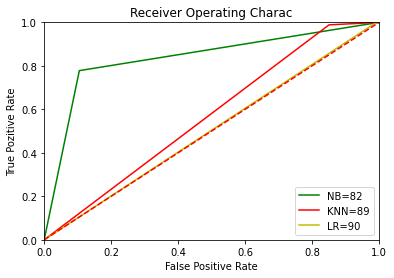

In [72]:
plt.title("ROC")

plt.plot(fpr_nbf, tpr_nbf, 'g', label="NB=82" % roc_auc_nbf)
plt.plot(fpr_knnf, tpr_knnf, 'r', label="KNN=89" % roc_auc_nbf)
plt.plot(fpr_lrf, tpr_lrf, 'y', label="LR=90" % roc_auc_nbf)

plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Pozitive Rate')
plt.xlabel('False Positive Rate')
plt.show()